In [1]:
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
from collections import defaultdict
warnings.filterwarnings('ignore')

## Data investigation and preparation

In [2]:
paris = pd.read_csv('./paris.csv')
bordeaux = pd.read_csv('./bordeaux.csv')

In [3]:
paris.head(3)

id                                               name  host_id  \
0   23441  Charming at Montmartre & rue Lepic- mobility l...    91706   
1   24260                   Lovely place near Champs Elysees    98012   
2  130420                 Charming Apartment 2BR in Paris 9e   641777   

  host_name  neighbourhood_group        neighbourhood  latitude  longitude  \
0     Elise                  NaN    Buttes-Montmartre  48.88408    2.33478   
1  Emmanuel                  NaN  Batignolles-Monceau  48.88090    2.30388   
2   Yassine                  NaN                Opéra  48.88073    2.34297   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt     70              30                 84  2022-08-31   
1  Entire home/apt     85              30                 30  2017-08-11   
2  Entire home/apt    213               1                188  2022-09-06   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.55                               1               115   
1               0.20                               2               319   
2               1.38                               1               301   

   number_of_reviews_ltm                                            license  
0                      3  Available with a mobility lease only ("bail mo...  
1                      0  Available with a mobility lease only ("bail mo...  
2                     32                                      7510900711502

In [4]:
bordeaux.head(3)

id                                              name  \
0  579652405189065070  Appartement cosy dans centre historique de Bourg   
1            49797548    Maison de vacances entre Bordeaux et le Bassin   
2              218103                B&B Apart.Suite  / tropical garden   

    host_id      host_name  neighbourhood_group        neighbourhood  \
0  15134863  Fanny Et Paul                 Ambs                 Ambs   
1  83677621      Francoise  Martignas-sur-Jalle  Martignas-sur-Jalle   
2   1127981           Luis                Bgles                Bgles   

    latitude  longitude        room_type  price  minimum_nights  \
0  45.039761  -0.559535  Entire home/apt     60               1   
1  44.816060  -0.777030  Entire home/apt    280               7   
2  44.815450  -0.548080  Entire home/apt    110               2   

   number_of_reviews last_review  reviews_per_month  \
0                 15  2022-09-09               2.74   
1                  3  2022-08-08               0.21   
2                 58  2021-10-24               0.44   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               351                     15   
1                               1               107                      2   
2                               4                 0                      4   

  license  
0     NaN  
1     NaN  
2     NaN

In [5]:
paris.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [6]:
bordeaux.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

#### Check for null values

In [7]:
paris.isnull().sum()

id                                    0
name                                 41
host_id                               0
host_name                             7
neighbourhood_group               61365
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       11880
reviews_per_month                 11880
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           24449
dtype: int64

In [8]:
bordeaux.isnull().sum()

id                                   0
name                                 1
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1640
reviews_per_month                 1640
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           7079
dtype: int64

With the help of these 16 columns, we can perform very in-depth data exploration on this dataset. We can already notice some missing data, thus processing and cleaning NaN values will be necessary. In the future, mapping specific values to ones and zeros may be necessary for predictive analytics.

In [9]:
sum([bordeaux.neighbourhood_group != bordeaux.neighbourhood][0])

7410

In [10]:
bordeaux[['neighbourhood_group','neighbourhood']].head(20)

neighbourhood_group                              neighbourhood
0                  Ambs                                       Ambs
1   Martignas-sur-Jalle                        Martignas-sur-Jalle
2                 Bgles                                      Bgles
3              Bordeaux                               Bordeaux Sud
4              Bordeaux     Chartrons - Grand Parc - Jardin Public
5              Bordeaux                    Centre ville (Bordeaux)
6              Bordeaux                    Centre ville (Bordeaux)
7              Bordeaux                    Centre ville (Bordeaux)
8                 Bgles                                      Bgles
9                 Bgles                                      Bgles
10             Bordeaux                    Centre ville (Bordeaux)
11                Bgles                                      Bgles
12                Bgles                                      Bgles
13             Bordeaux     Chartrons - Grand Parc - Jardin Public
14             Bordeaux  Saint Augustin - Tauzin - Alphonse Dupeux
15              Lormont                                    Lormont
16             Bordeaux     Chartrons - Grand Parc - Jardin Public
17               Bruges                                     Bruges
18                Cenon                    Plaisance-Loret-Maregue
19             Bordeaux                               Bordeaux Sud

In [11]:
paris.drop(['neighbourhood_group', 'last_review'], axis=1, inplace=True)
bordeaux.drop(['neighbourhood_group', 'last_review'], axis=1, inplace=True)
paris.fillna({'reviews_per_month':0,  'name': '', 'host_name': ''}, inplace=True)
bordeaux.fillna({'reviews_per_month':0,  'name': '', 'host_name': ''}, inplace=True)

In [12]:
paris.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           24449
dtype: int64

#### Just a quick look on unique neighbourhoods

In [13]:
paris.neighbourhood.unique()

array(['Buttes-Montmartre', 'Batignolles-Monceau', 'Opéra', 'Vaugirard',
       'Temple', 'Hôtel-de-Ville', 'Buttes-Chaumont', 'Popincourt',
       'Ménilmontant', 'Bourse', 'Passy', 'Louvre', 'Reuilly', 'Panthéon',
       'Observatoire', 'Entrepôt', 'Palais-Bourbon', 'Gobelins',
       'Luxembourg', 'Élysée'], dtype=object)

In [14]:
bordeaux.neighbourhood.unique()

array(['Ambs', 'Martignas-sur-Jalle', 'Bgles', 'Bordeaux Sud',
       'Chartrons - Grand Parc - Jardin Public',
       'Centre ville (Bordeaux)',
       'Saint Augustin - Tauzin - Alphonse Dupeux', 'Lormont', 'Bruges',
       'Plaisance-Loret-Maregue', 'Talence', 'Magonty', 'Le Bouscat',
       "Villenave-d'Ornon", 'Saint-Mdard-en-Jalles', 'Les Eyquems',
       'Saint-Aubin-de-Mdoc', 'Bordeaux Maritime', 'Caudran',
       'La Bastide', 'Nansouty - Saint Gens', 'Palmer-Gravires-Cavailles',
       'Carbon-Blanc', 'Gradignan', 'La Glacire', 'France Alouette',
       'Ambars-et-Lagrave', 'Eysines', 'Chiquet-Fontaudin', 'Blanquefort',
       'Bourran', 'Floirac', 'Parempuyre', 'Gambetta-Mairie-Lissandre',
       'Chemin Long', 'Verthamon', 'Artigues-Prs-Bordeaux', 'Le Monteil',
       'Bouliac', 'Arlac', '3M-Bourgailh', 'La Paillre-Compostelle',
       'Capeyron', 'Brivazac-Candau', 'Le Haillan', 'Le Taillan-Mdoc',
       'Saige', 'Sardine', 'Beaudsert', 'Nos', 'Centre ville (Merignac)',
  

#### The comparison of offers in Paris and Bordeaux

In [15]:
print(f'Paris {len(paris)} offers; Bordeaux {len(bordeaux)} offers')

Paris 61365 offers; Bordeaux 10885 offers


In [16]:
print(f'Paris has {round(len(paris)/len(bordeaux), 2)} times more offers than Bordeaux')

Paris has 5.64 times more offers than Bordeaux


**We got a general idea of the data and also cleaned it up for further work. Now we can start analyzing**

## Neighbourhoods

Text(0.5, 1.0, 'PARIS')

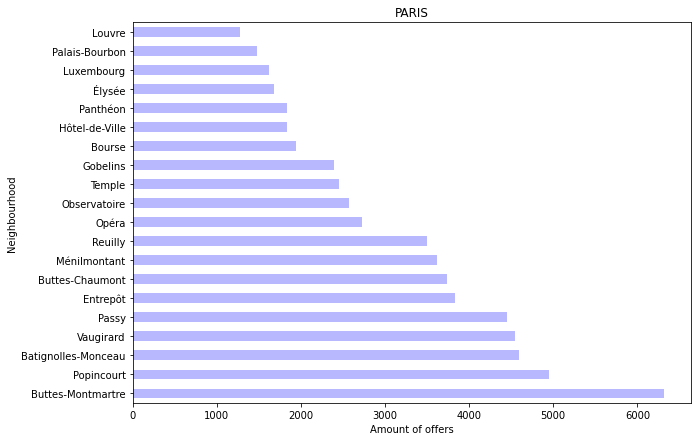

In [17]:
fig, ax = plt.subplots(figsize=(10,7))
paris.neighbourhood.value_counts().plot(kind='barh', legend = False, ax=ax, color='#B8B8FF')
ax.set_ylabel('Neighbourhood')
ax.set_xlabel('Amount of offers')
ax.set_title('PARIS')

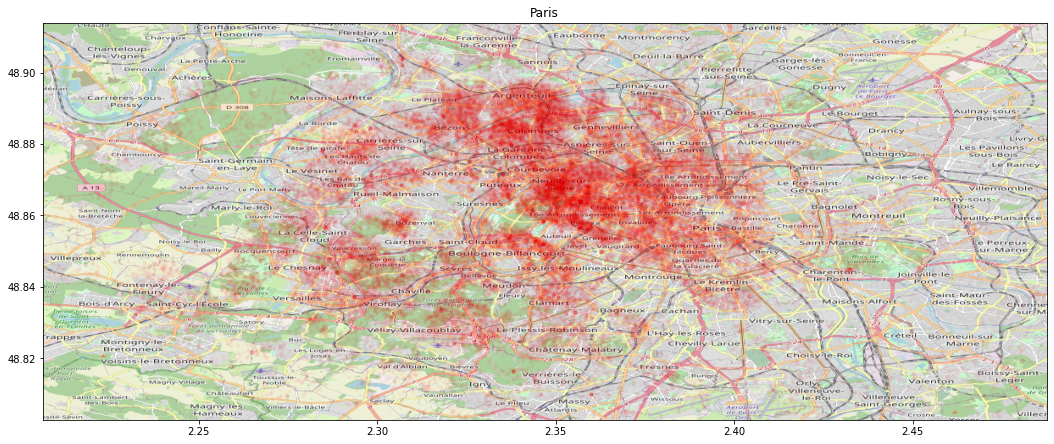

In [18]:
paris_b = (
    (
        paris.longitude.min(),
        paris.longitude.max(),
        paris.latitude.min(),
        paris.latitude.max()
    )
)

ruh_m = plt.imread('./paris_max.png')


fig, ax = plt.subplots(figsize = (18,17))
ax.scatter(paris.longitude, paris.latitude, zorder=1, alpha= 0.03, c='r', s=10)
ax.set_title('Paris')
ax.set_xlim(paris_b[0],paris_b[1])
ax.set_ylim(paris_b[2],paris_b[3])
im = ax.imshow(ruh_m, zorder=0, extent = paris_b, aspect= 'equal')

Text(0.5, 1.0, 'Bordeaux')

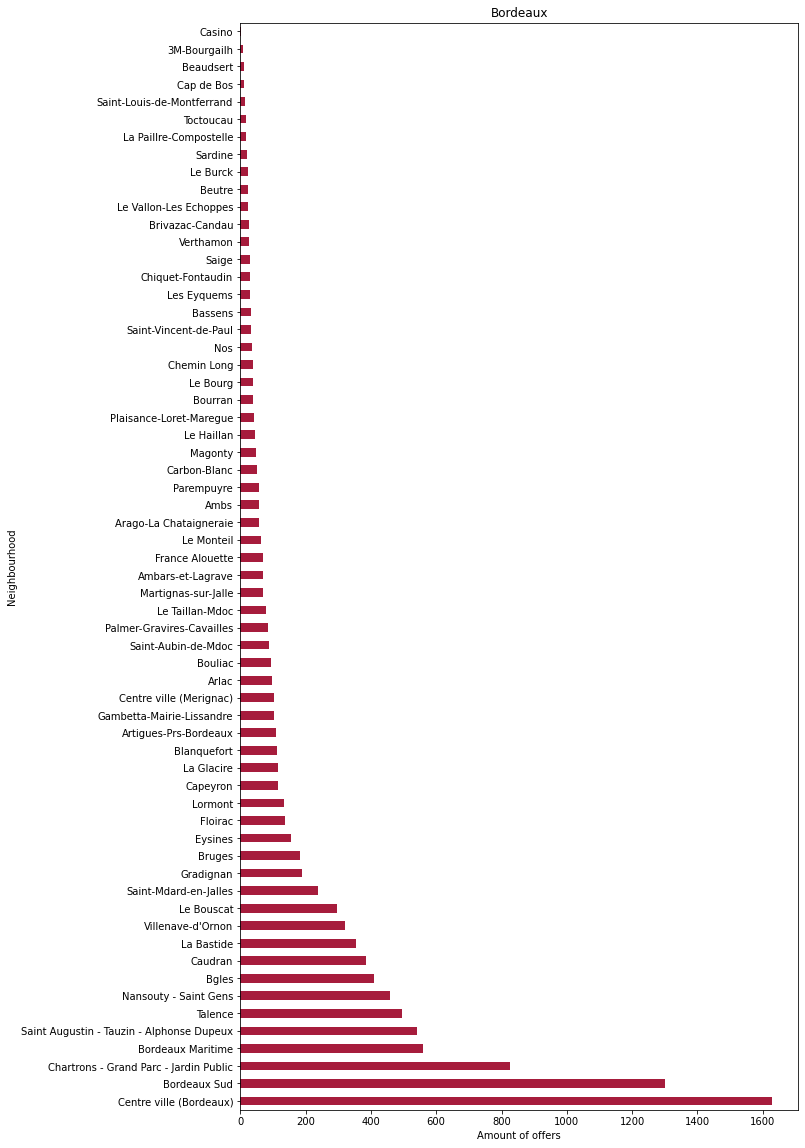

In [19]:
fig, ax = plt.subplots(figsize=(10,20))
bordeaux.neighbourhood.value_counts().plot(kind='barh', legend = False, ax=ax, color='#A61C3C')
ax.set_ylabel('Neighbourhood')
ax.set_xlabel('Amount of offers')
ax.set_title('Bordeaux')

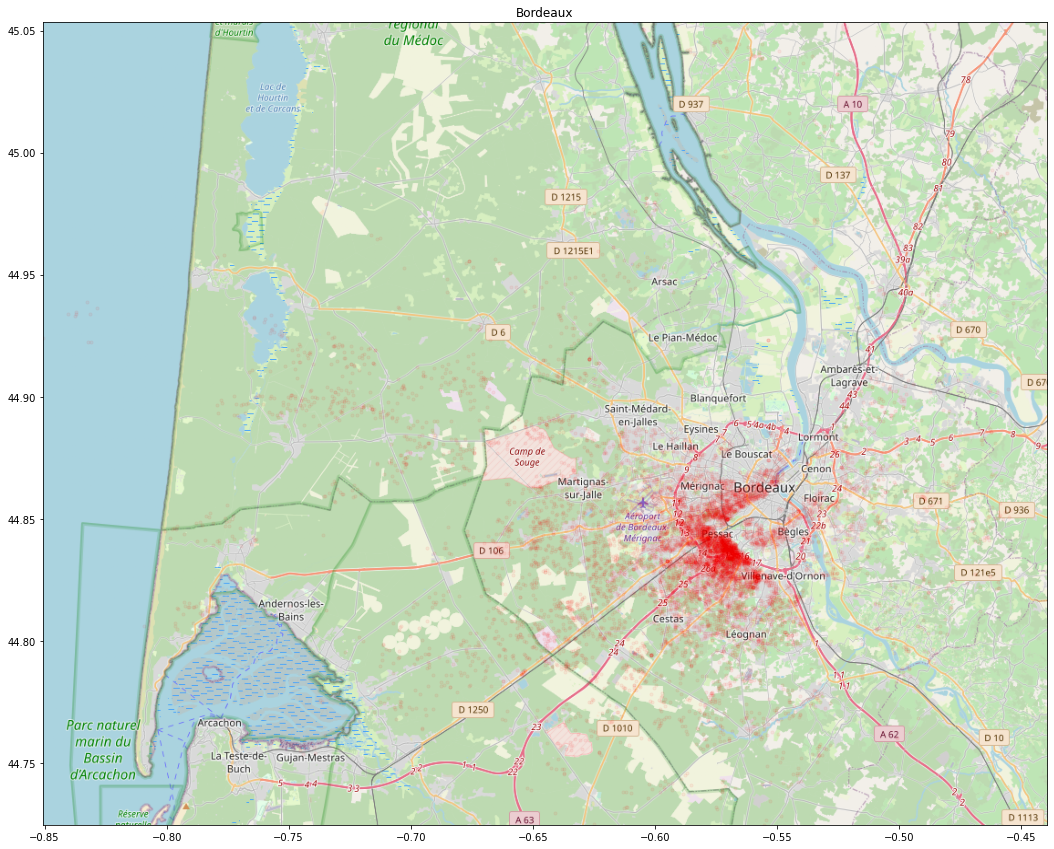

In [20]:
bordeaux_b = (
    (
        bordeaux.longitude.min(),
        bordeaux.longitude.max(),
        bordeaux.latitude.min(),
        bordeaux.latitude.max()
    )
)

ruh_m = plt.imread('./bordeaux_max.png')


fig, ax = plt.subplots(figsize = (18,17))
ax.scatter(bordeaux.longitude, bordeaux.latitude, zorder=1, alpha= 0.05, c='r', s=10)
ax.set_title('Bordeaux')
ax.set_xlim(bordeaux_b[0],bordeaux_b[1])
ax.set_ylim(bordeaux_b[2],bordeaux_b[3])
im = ax.imshow(ruh_m, zorder=0, extent = bordeaux_b, aspect= 'equal')

Text(0.5, 1.0, 'Paris')

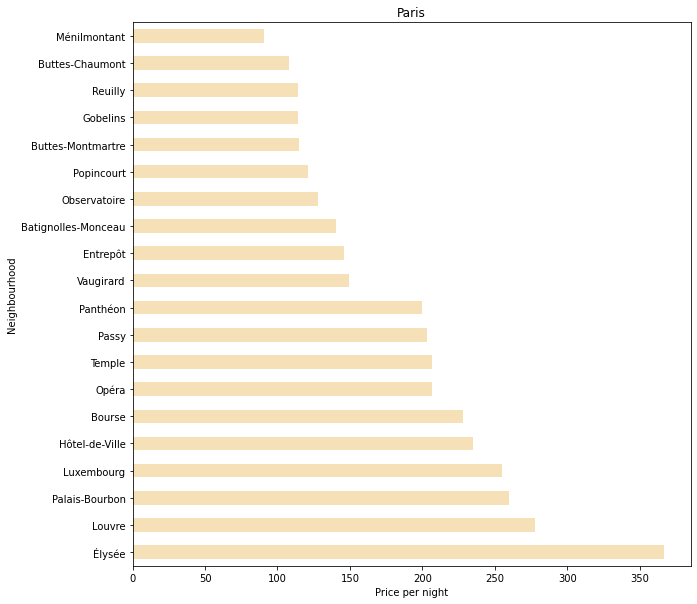

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
paris.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).plot(kind='barh', legend = False, ax=ax, color='#F5E0B7')
ax.set_ylabel('Neighbourhood')
ax.set_xlabel('Price per night')
ax.set_title('Paris')

Text(0.5, 1.0, 'Bordeaux')

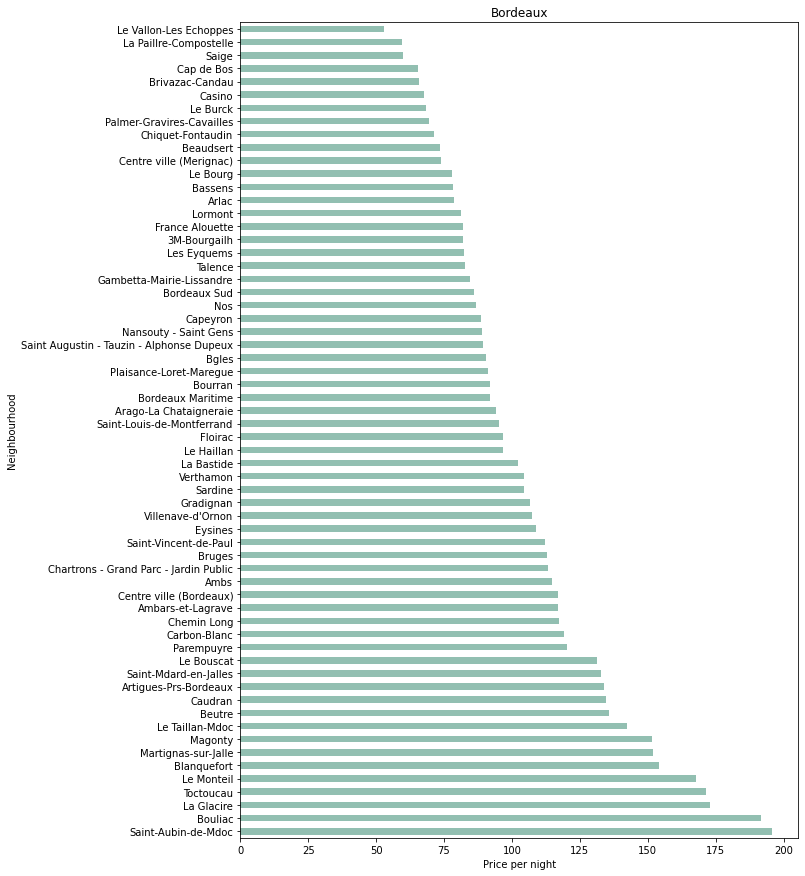

In [22]:
fig, ax = plt.subplots(figsize=(10, 15))
bordeaux.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).plot(kind='barh', legend = False, ax=ax, color='#92BFB1')
ax.set_ylabel('Neighbourhood')
ax.set_xlabel('Price per night')
ax.set_title('Bordeaux')

In [85]:
print(f' avg price Paris {round(paris.price.mean(), 2)}')
print(f' avg price Bordeaux {round(bordeaux.price.mean(), 2)}')
print(f' Paris {round(paris.price.mean()/bordeaux.price.mean(), 2)} times more expensive than Bordeaux')

 avg price Paris 161.81
 avg price Bordeaux 105.81
 Paris 1.53 times more expensive than Bordeaux


#### Price per stay

In [23]:
paris['min_spend'] = paris.minimum_nights * paris.price
bordeaux['min_spend'] = bordeaux.minimum_nights * bordeaux.price

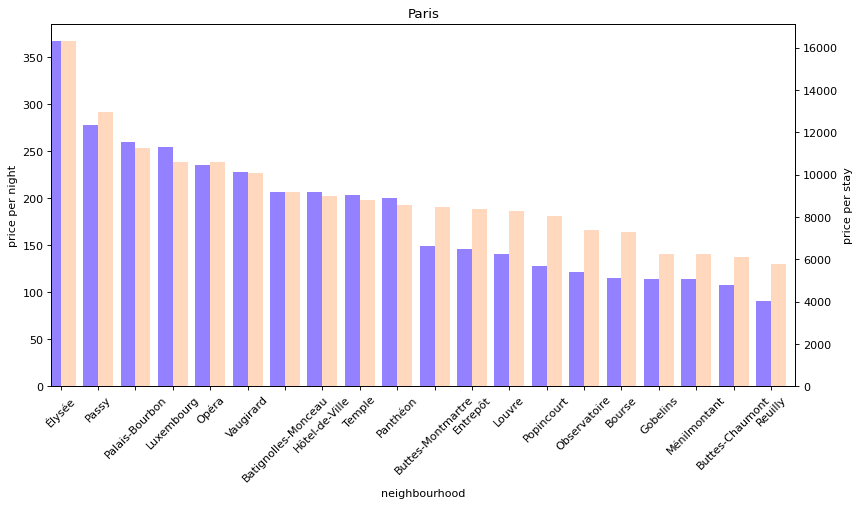

In [24]:
fig = plt.figure(figsize=(12, 6), dpi=80) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax.set_title('Paris')
width = 0.4

paris.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).plot(kind='bar', color='#9381FF', ax=ax, width=width, position=1)
paris.groupby('neighbourhood')['min_spend'].mean().sort_values(ascending=False).plot(kind='bar', color='#FFD8BE', ax=ax2, width=width, position=0)

ax.set_ylabel('price per night')
ax2.set_ylabel('price per stay')
ax.tick_params(axis='x', rotation=45)
plt.show()

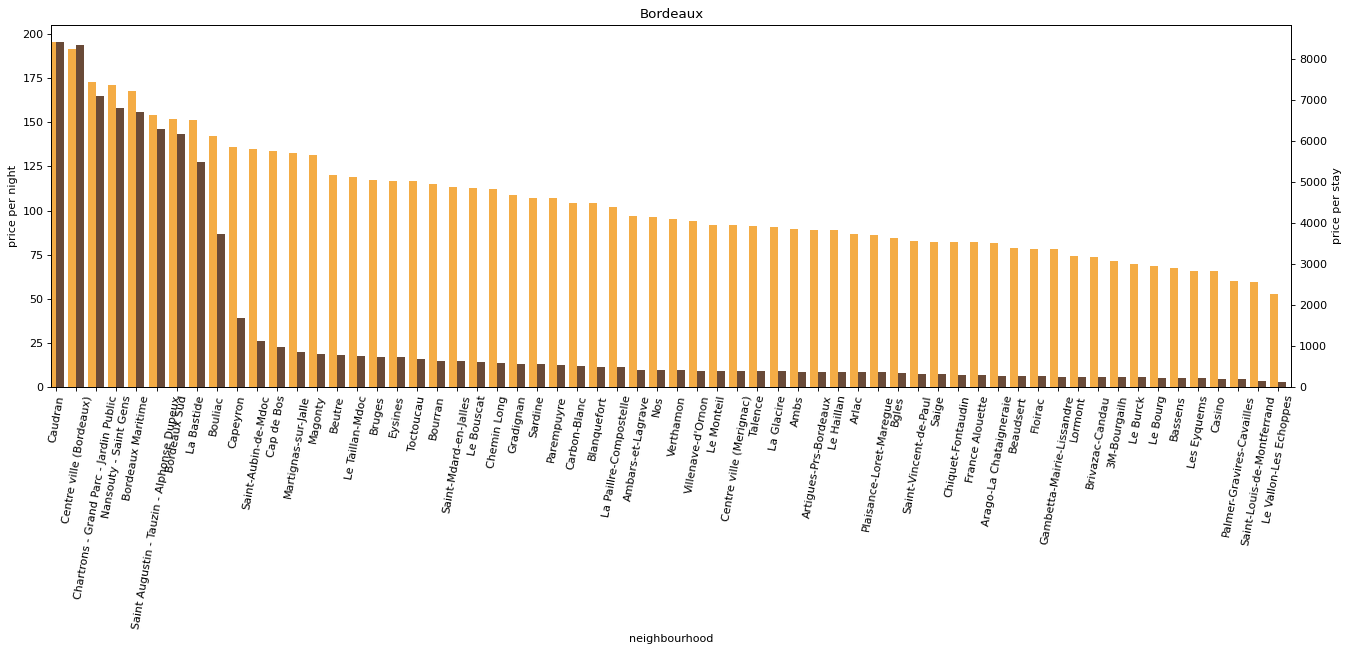

In [25]:
fig = plt.figure(figsize=(20, 6), dpi=80) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax.set_title('Bordeaux')
width = 0.4

bordeaux.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).plot(kind='bar', color='#F4AC45', ax=ax, width=width, position=1)
bordeaux.groupby('neighbourhood')['min_spend'].mean().sort_values(ascending=False).plot(kind='bar', color='#694A38', ax=ax2, width=width, position=0)

ax.set_ylabel('price per night')
ax2.set_ylabel('price per stay')
ax.tick_params(axis='x', rotation=80)
plt.show()

In [86]:
print(f' avg min_spend Paris {round(paris.min_spend.mean(), 2)}')
print(f' avg min_spend Bordeaux {round(bordeaux.min_spend.mean(), 2)}')
print(f' Paris {round(paris.min_spend.mean()/bordeaux.min_spend.mean(), 2)} times more expensive than Bordeaux')

 avg min_spend Paris 8794.85
 avg min_spend Bordeaux 4193.03
 Paris 2.1 times more expensive than Bordeaux


**It can be concluded that it is easier to rent an apartment in Paris for a few days than in Bordeaux, where they often rent for a long time**

## Types of stay

In [26]:
print('Paris: ')
round(paris.room_type.value_counts()/len(paris) * 100, 2)

Paris: 


Entire home/apt    84.27
Private room       13.40
Hotel room          1.73
Shared room         0.61
Name: room_type, dtype: float64

In [27]:
print('Bordeaux: ')
round(bordeaux.room_type.value_counts()/len(bordeaux) * 100, 2)

Bordeaux: 


Entire home/apt    76.05
Private room       22.91
Shared room         0.62
Hotel room          0.41
Name: room_type, dtype: float64

#### We will consider only neighbourhoods with top 5 amount of offers

In [28]:
n_p = paris.neighbourhood.value_counts().head(5).index.tolist()
n_b = bordeaux.neighbourhood.value_counts().head(5).index.tolist()

##### The count of offers of different room types in top 5 neighbourhoods

Paris


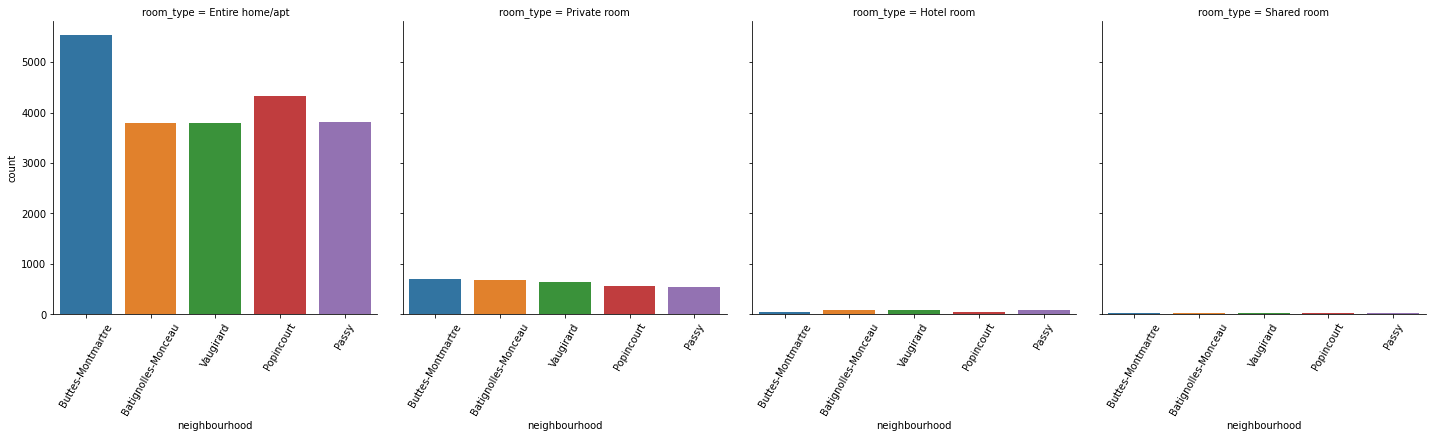

In [29]:
viz=sns.catplot(x='neighbourhood',col='room_type', data=paris.loc[paris['neighbourhood'].isin(n_p)], kind='count')
viz.set_xticklabels(rotation=60)
print("Paris")

Bordeaux


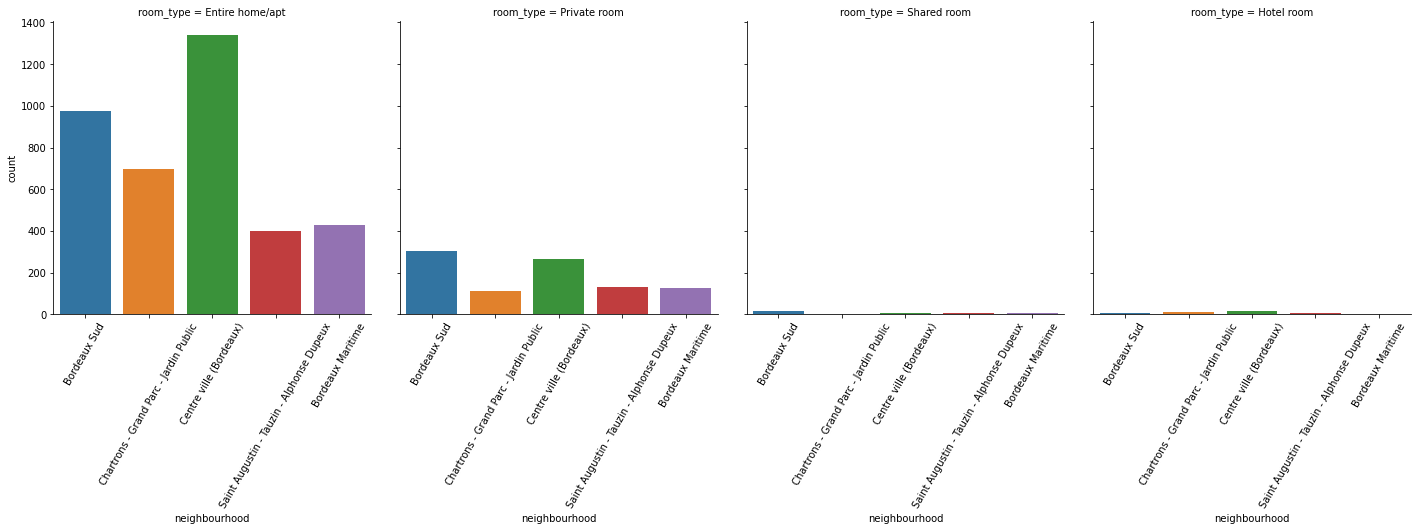

In [30]:
viz=sns.catplot(x='neighbourhood',col='room_type', data=bordeaux.loc[bordeaux['neighbourhood'].isin(n_b)], kind='count')
viz.set_xticklabels(rotation=60)
print("Bordeaux")

#### Price distribution depending on the type of room in different areas

In [31]:
print("PARIS")

PARIS


[Text(0.5, 1.0, 'Hotel room')]

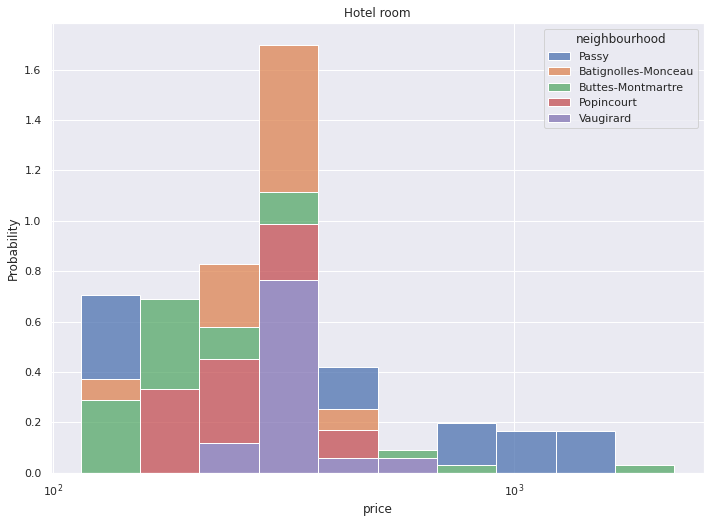

In [32]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(
    paris.loc[paris['neighbourhood'].isin(n_p)& paris['room_type'].isin(['Hotel room'])].dropna(), x="price", hue="neighbourhood", multiple="stack",
    stat="probability", common_norm=False, log_scale=(True, False)
).set(title='Hotel room')

[Text(0.5, 1.0, 'Shared room')]

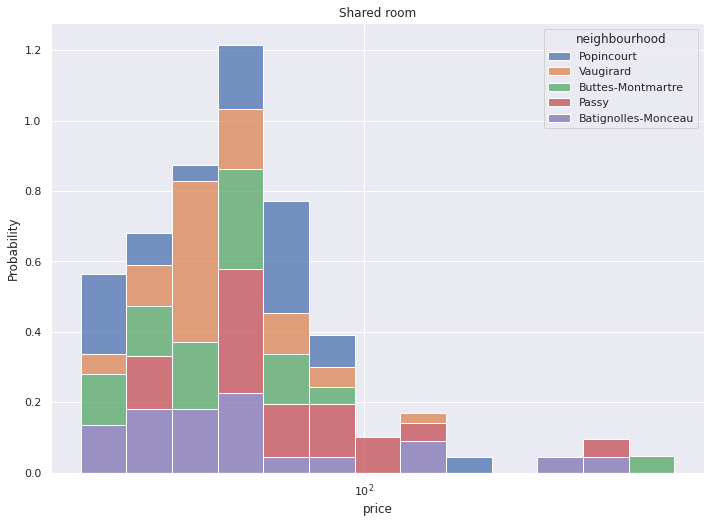

In [33]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(
    paris.loc[paris['neighbourhood'].isin(n_p)& paris['room_type'].isin(['Shared room'])], x="price", hue="neighbourhood", multiple="stack",
    stat="probability", common_norm=False, log_scale=(True, False)
).set(title='Shared room')

[Text(0.5, 1.0, 'Private room')]

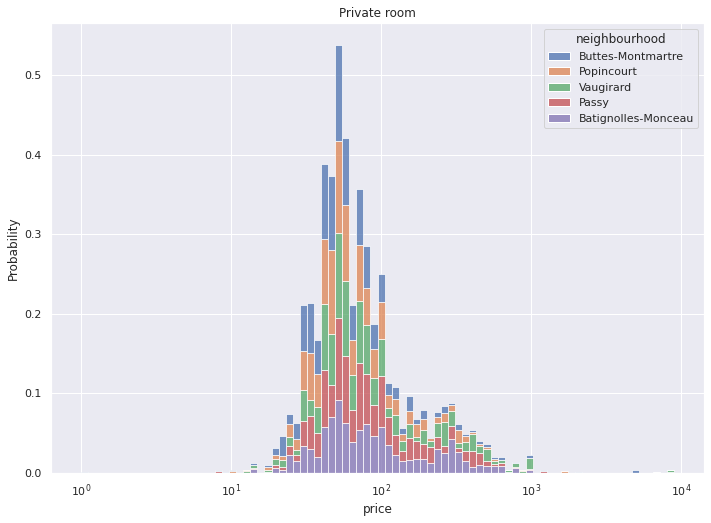

In [34]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(
    paris.loc[paris['neighbourhood'].isin(n_p)& paris['room_type'].isin(['Private room'])], x="price", hue="neighbourhood", multiple="stack",
    stat="probability", common_norm=False, log_scale=(True, False)
).set(title='Private room')

[Text(0.5, 1.0, 'Entire home/apt')]

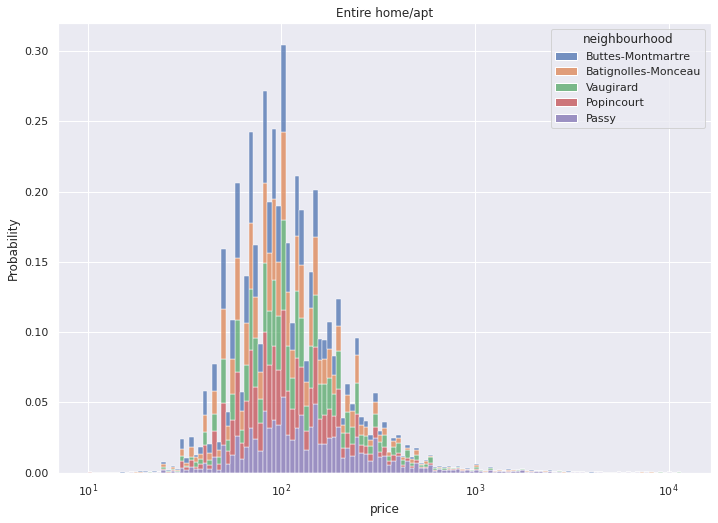

In [35]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(
    paris.loc[paris['neighbourhood'].isin(n_p)& paris['room_type'].isin(['Entire home/apt'])], x="price", hue="neighbourhood", multiple="stack",
    stat="probability", common_norm=False, log_scale=(True, False)
).set(title='Entire home/apt')

In [36]:
print("Bordeaux")

Bordeaux


[Text(0.5, 1.0, 'Hotel room')]

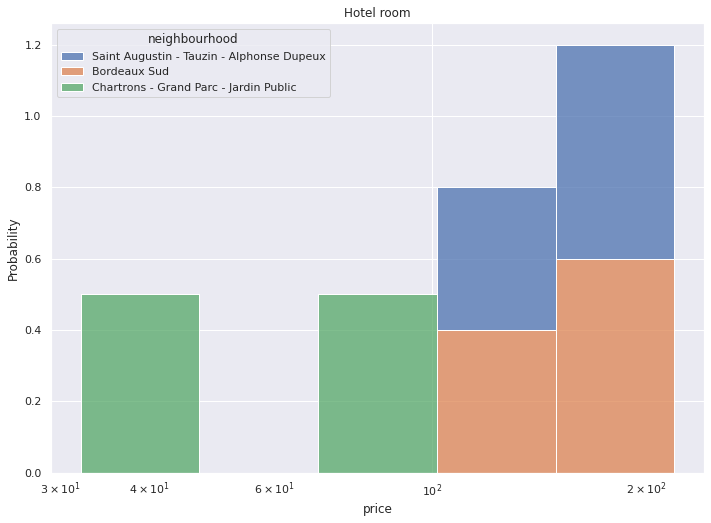

In [37]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(
    bordeaux.loc[bordeaux['neighbourhood'].isin(n_b)& bordeaux['room_type'].isin(['Hotel room'])].dropna(), x="price", hue="neighbourhood", multiple="stack",
    stat="probability", common_norm=False, log_scale=(True, False)
).set(title='Hotel room')

[Text(0.5, 1.0, 'Shared room')]

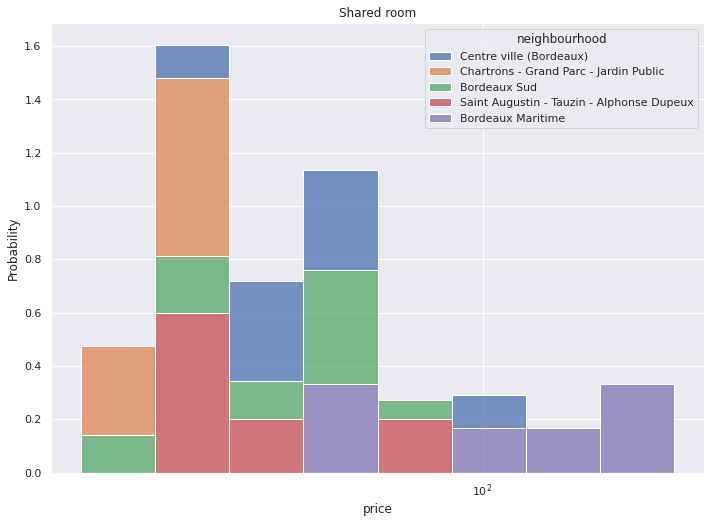

In [38]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(
    bordeaux.loc[bordeaux['neighbourhood'].isin(n_b)& bordeaux['room_type'].isin(['Shared room'])], x="price", hue="neighbourhood", multiple="stack",
    stat="probability", common_norm=False, log_scale=(True, False)
).set(title='Shared room')

[Text(0.5, 1.0, 'Private room')]

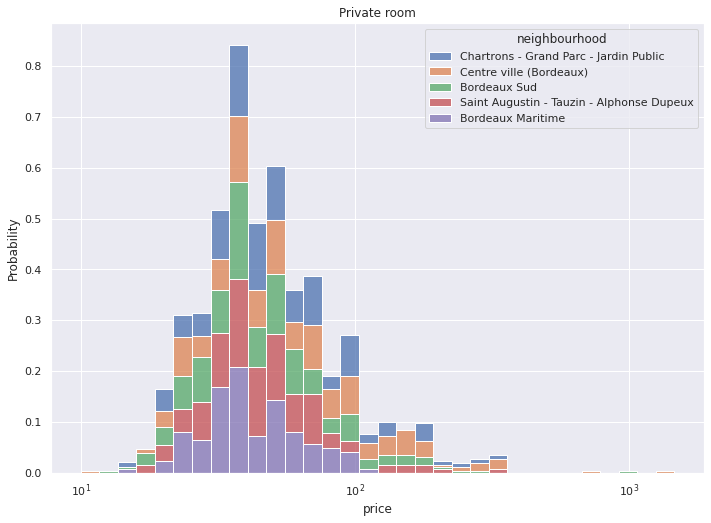

In [39]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(
    bordeaux.loc[bordeaux['neighbourhood'].isin(n_b)& bordeaux['room_type'].isin(['Private room'])], x="price", hue="neighbourhood", multiple="stack",
    stat="probability", common_norm=False, log_scale=(True, False)
).set(title='Private room')

[Text(0.5, 1.0, 'Entire home/apt')]

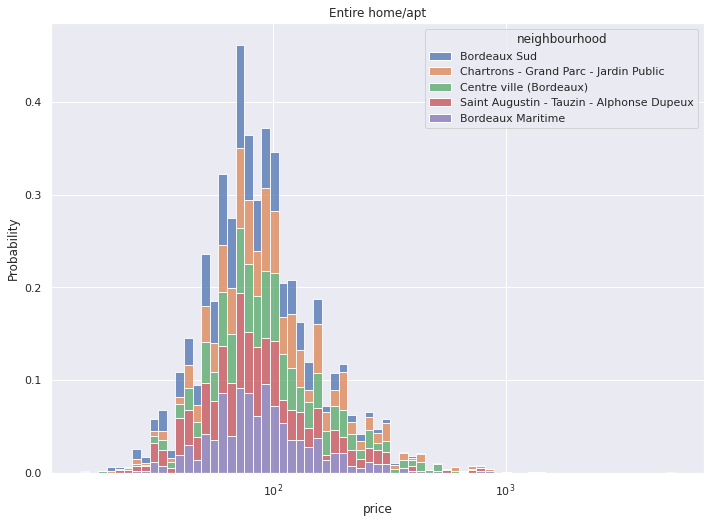

In [40]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(
    bordeaux.loc[bordeaux['neighbourhood'].isin(n_b)& bordeaux['room_type'].isin(['Entire home/apt'])], x="price", hue="neighbourhood", multiple="stack",
    stat="probability", common_norm=False, log_scale=(True, False)
).set(title='Entire home/apt')

**Now we know in which areas we are more likely to find the right type of housing at the expected price**

### REVIEWS & AVAILABILITY

#### Paris

In [41]:
paris[['name','number_of_reviews', 'availability_365']].sort_values(by=['number_of_reviews'], ascending=False).head(5)

name  number_of_reviews  \
22725  Double/Twin Room, close to Opera and the Louvr...               2391   
56571      Studio Double - Break&Home Paris Italie (M 7)               1720   
15548    Sweet & cosy room next to Canal Saint Martin ❤️               1608   
26744     Hotel Boronali *** - Double room in Montmartre               1118   
28620                             Nice Room for 2 people               1069   

       availability_365  
22725               347  
56571                75  
15548               120  
26744               336  
28620               263

In [42]:
paris[['name','number_of_reviews_ltm', 'availability_365']].sort_values(by=['number_of_reviews_ltm'], ascending=False).head(5)

name  \
56571      Studio Double - Break&Home Paris Italie (M 7)   
55108       Studio Twin  - Break&Home Paris Italie (M 7)   
57646  Studio for 2 People | Sejours & Affaires Bagnolet   
22725  Double/Twin Room, close to Opera and the Louvr...   
26744     Hotel Boronali *** - Double room in Montmartre   

       number_of_reviews_ltm  availability_365  
56571                   1356                75  
55108                    903                75  
57646                    902               329  
22725                    793               347  
26744                    768               336

In [43]:
paris[['name','reviews_per_month', 'availability_365']].sort_values(by=['reviews_per_month'], ascending=False).head(5)

name  reviews_per_month  \
56571      Studio Double - Break&Home Paris Italie (M 7)              89.90   
57646  Studio for 2 People | Sejours & Affaires Bagnolet              80.30   
55108       Studio Twin  - Break&Home Paris Italie (M 7)              60.06   
22725  Double/Twin Room, close to Opera and the Louvr...              53.41   
33408       Bed in Dorm of 8 Beds "The Big One" in Paris              32.86   

       availability_365  
56571                75  
57646               329  
55108                75  
22725               347  
33408               328

In [87]:
corr = paris[['price', 'minimum_nights','reviews_per_month','calculated_host_listings_count', 'availability_365']].corr()
corr.style.background_gradient(cmap='coolwarm')

In [45]:
print('Paris')
paris.availability_365.quantile([0.25, 0.5, 0.75, 0.95])

Paris


0.25      0.0
0.50     26.0
0.75    231.0
0.95    349.0
Name: availability_365, dtype: float64

In [73]:
len(paris[paris.availability_365 == 0])

24837

#### Bordeaux

In [46]:
bordeaux[['name','number_of_reviews', 'availability_365']].sort_values(by=['number_of_reviews'], ascending=False).head(5)

name  number_of_reviews  \
7806           Studio Double - Montempô Bordeaux centre               1222   
49       BEAUTIFUL 1 BEDROOM FLAT HEART OF THE OLD TOWN                953   
927      Chambre privée  chez l'habitant face à la gare                796   
449   Belle et grande chambre privée avec salle de b...                673   
988   Chambre privée chez l'habitant gare  saintjean...                660   

      availability_365  
7806               108  
49                 235  
927                349  
449                125  
988                355

In [47]:
bordeaux[['name','number_of_reviews_ltm', 'availability_365']].sort_values(by=['number_of_reviews_ltm'], ascending=False).head(5)

name  \
7806           Studio Double - Montempô Bordeaux centre   
3976                             Studio avec lit double   
5812   Duplex Original à " Petit prix " au centre ville   
8076     Maison entière au calme, au Centre de Bordeaux   
5897  T2 Très Lumineux, Fonctionnel à Bordeaux Centre !   

      number_of_reviews_ltm  availability_365  
7806                    873               108  
3976                    244               285  
5812                    214                78  
8076                    187                68  
5897                    164                74

In [48]:
bordeaux[['name','reviews_per_month', 'availability_365']].sort_values(by=['reviews_per_month'], ascending=False).head(5)

name  reviews_per_month  \
7806           Studio Double - Montempô Bordeaux centre              85.06   
8076     Maison entière au calme, au Centre de Bordeaux              16.45   
5812   Duplex Original à " Petit prix " au centre ville              15.43   
6821  Grand Studio, très lumineux au centre de Borde...              13.60   
8477  Grand appartement Climatisé au centre de Borde...              13.29   

      availability_365  
7806               108  
8076                68  
5812                78  
6821                73  
8477                76

In [88]:
corr = bordeaux[['price', 'minimum_nights','reviews_per_month','calculated_host_listings_count', 'availability_365']].corr()
corr.style.background_gradient(cmap='coolwarm')

In [50]:
print('Bordeaux')
bordeaux.availability_365.quantile([0.25, 0.5, 0.75, 0.95])

Bordeaux


0.25      0.0
0.50     65.0
0.75    256.0
0.95    357.0
Name: availability_365, dtype: float64

**We found out that both in Paris and Bordeaux there is a chain of hotels that is very popular with tourists (I think it's worth staying there :).  In addition, we found that the number of reviews does not correlate with workload**

## HOSTS & Listings

In [51]:
paris.host_id.value_counts().head(10)

314994947    269
440295601    202
50502817     197
7642792      195
50978178     193
402191311    185
33889201     165
6053288      143
440992832    125
26981054     123
Name: host_id, dtype: int64

In [52]:
## take 314994947

In [53]:
paris[paris.host_id == 314994947].neighbourhood.value_counts()

Passy                  41
Élysée                 40
Palais-Bourbon         30
Luxembourg             22
Batignolles-Monceau    21
Opéra                  21
Hôtel-de-Ville         18
Temple                 17
Bourse                 15
Panthéon               12
Louvre                  7
Popincourt              7
Entrepôt                5
Buttes-Chaumont         5
Buttes-Montmartre       4
Vaugirard               2
Reuilly                 1
Observatoire            1
Name: neighbourhood, dtype: int64

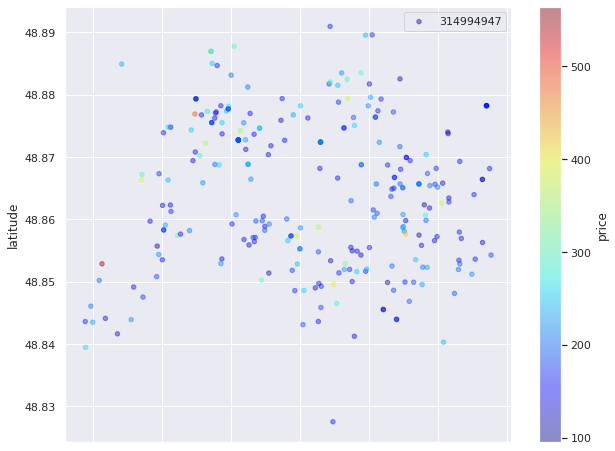

In [54]:
viz=paris[paris.host_id == 314994947].plot(kind='scatter', x='longitude', y='latitude', label='314994947', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz.legend()

In [55]:
p_box_s = (
    (
        paris[paris.host_id == 314994947].longitude.min(),
        paris[paris.host_id == 314994947].longitude.max(),
        paris[paris.host_id == 314994947].latitude.min(),
        paris[paris.host_id == 314994947].latitude.max()
    )
)
p_box_s

(2.2578723, 2.3753365, 48.8275274, 48.8909628)

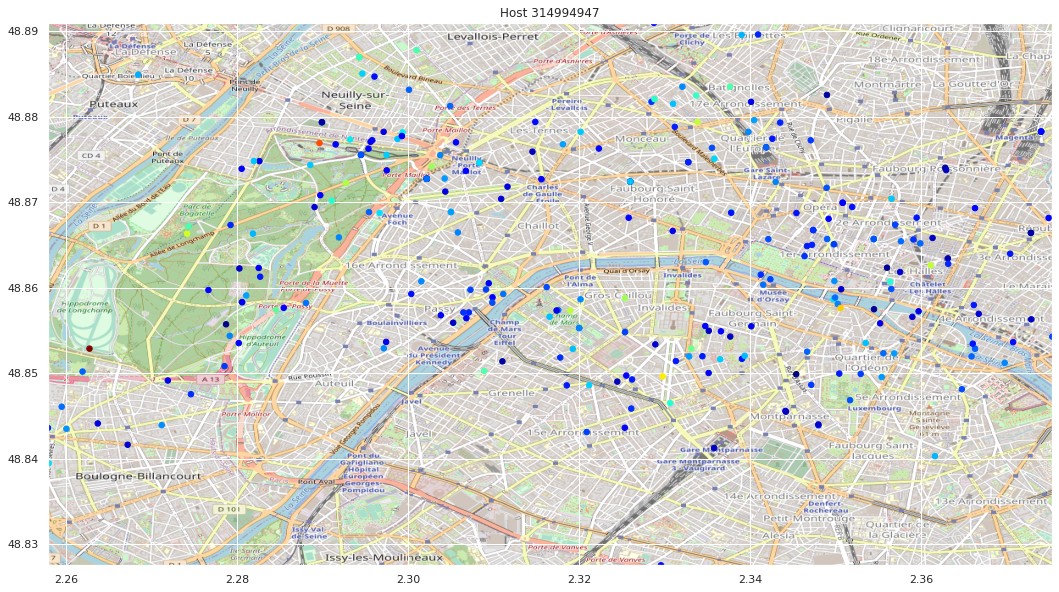

In [56]:
ruh_m = plt.imread('./paris.png')
df = paris[paris.host_id == 314994947]

fig, ax = plt.subplots(figsize = (18,17))
ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 1, c=df['price'],
                  cmap=plt.get_cmap('jet'), s=30)
ax.set_title('Host 314994947')
ax.set_xlim(p_box_s[0],p_box_s[1])
ax.set_ylim(p_box_s[2],p_box_s[3])
im = ax.imshow(ruh_m, zorder=0, extent = p_box_s, aspect= 'equal')

##### Bordeaux

In [57]:
bordeaux.host_id.value_counts().head(10)

72691486     92
9382960      90
18796190     32
402191311    29
390200553    26
164626639    26
321162574    23
446283504    22
224295815    21
414256747    21
Name: host_id, dtype: int64

In [58]:
# take 72691486

In [59]:
bordeaux_s = (
    (
        bordeaux[bordeaux.host_id == 72691486].longitude.min(),
        bordeaux[bordeaux.host_id == 72691486].longitude.max(),
        bordeaux[bordeaux.host_id == 72691486].latitude.min(),
        bordeaux[bordeaux.host_id == 72691486].latitude.max()
    )
)
bordeaux_s

(-0.625413, -0.557, 44.81832, 44.88109)

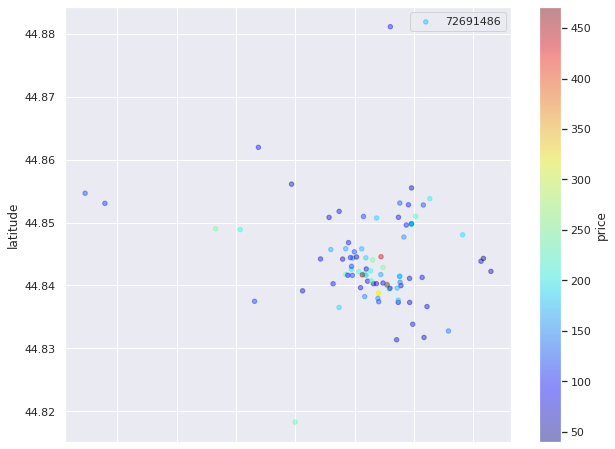

In [60]:
viz=bordeaux[bordeaux.host_id == 72691486].plot(kind='scatter', x='longitude', y='latitude', label='72691486', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz.legend()

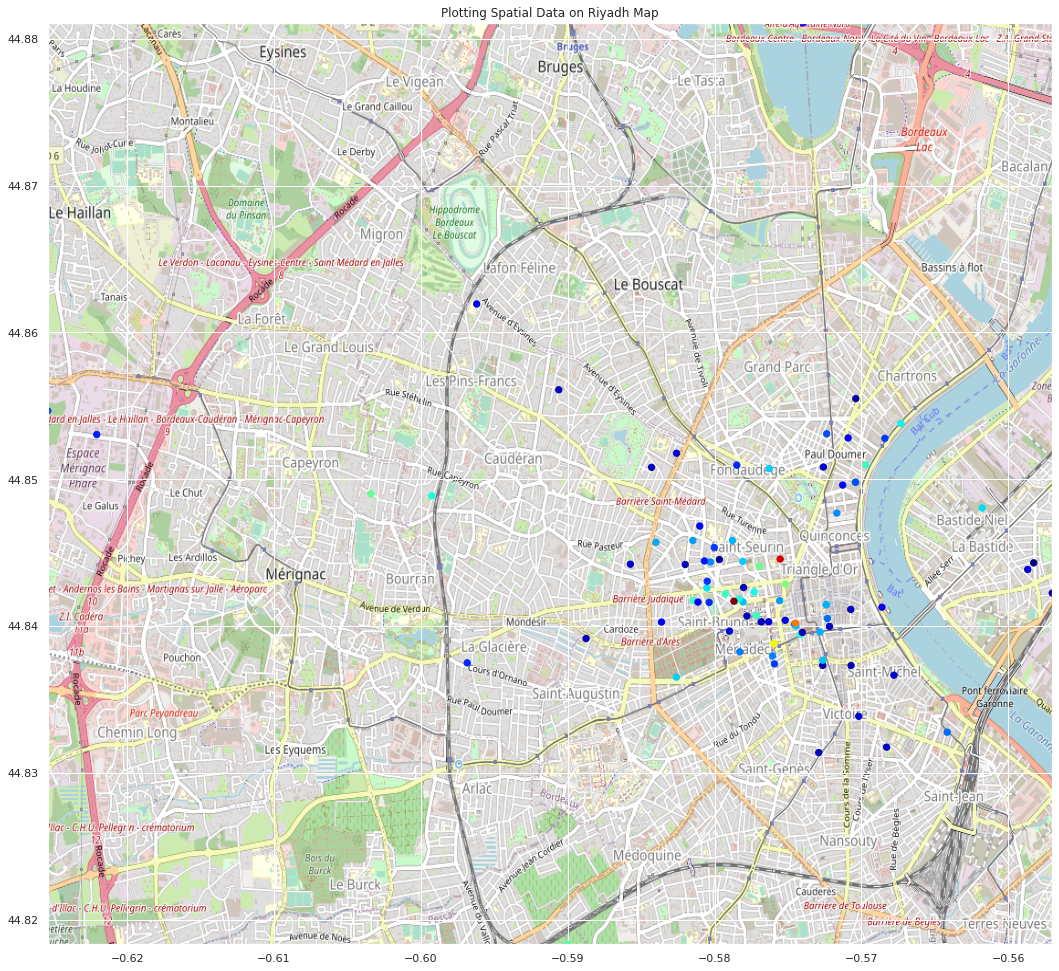

In [61]:
ruh_m = plt.imread('./bordeaux.png')
df = bordeaux[bordeaux.host_id == 72691486]

fig, ax = plt.subplots(figsize = (18,17))
ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 1, c=df['price'],
                  cmap=plt.get_cmap('jet'), s=40)
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(bordeaux_s[0],bordeaux_s[1])
ax.set_ylim(bordeaux_s[2],bordeaux_s[3])
im = ax.imshow(ruh_m, zorder=0, extent = bordeaux_s, aspect= 'equal')

**In both cities, the hosts who have the most offers have offers in the city center. Wonder where they got so much real estate in the center? 🧐**

## Lisence

##### Paris

Text(0.5, 1.0, 'Paris')

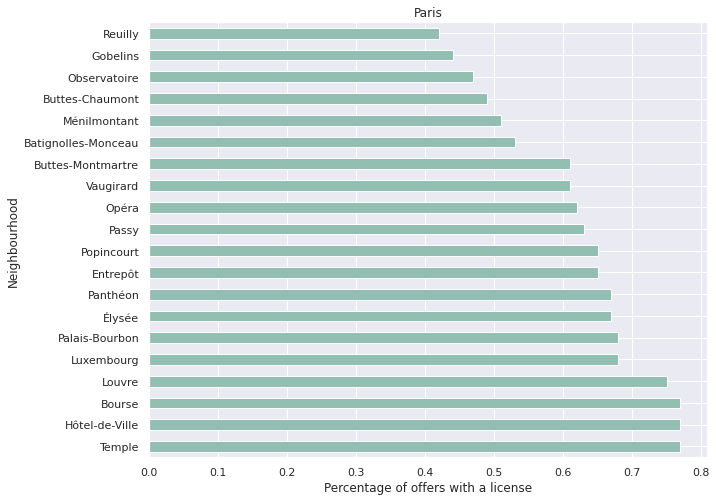

In [62]:
# which areas have more offers with a license
fig, ax = plt.subplots(figsize=(10, 8))
round((paris.groupby('neighbourhood')['license'].count()/paris.groupby('neighbourhood')['id'].count()), 2).sort_values(ascending=False).plot(kind='barh', legend = False, ax=ax, color='#92BFB1')
ax.set_ylabel('Neighbourhood')
ax.set_xlabel('Percentage of offers with a license')
ax.set_title('Paris')

In [63]:
has_license_for_all_Listings = (
    1.0 * paris.groupby('host_id')['license'].count()/paris.groupby('host_id')['id'].count()
).sort_values(ascending=False).values.tolist().count(1)
has_license_for_all_Listings

26263

In [64]:
all_hosts = len(
    (
        1.0 * paris.groupby('host_id')['license'].count()/paris.groupby('host_id')['id'].count()
    ).sort_values(ascending=False).values.tolist()
)
all_hosts

47116

In [77]:
# how many landlords have a license for all their offers
print(f'{round(100*has_license_for_all_Listings/all_hosts, 2)}%')

55.74%


##### Bordeaux

Text(0.5, 1.0, 'Bordeaux')

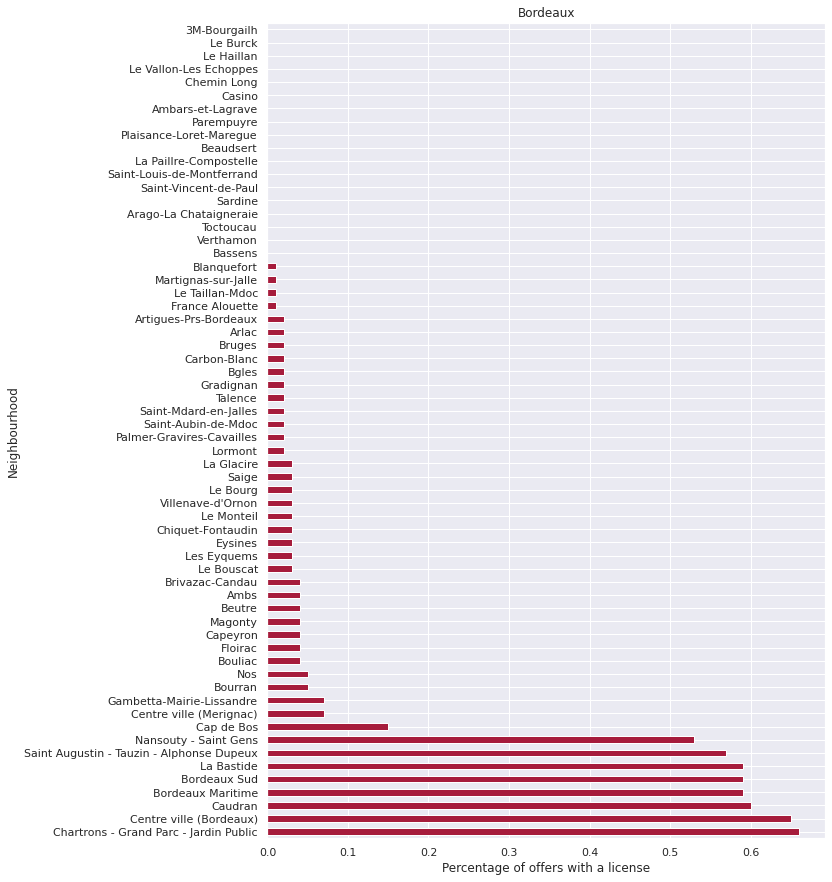

In [66]:
# which areas have more offers with a license
fig, ax = plt.subplots(figsize=(10, 15))
round((bordeaux.groupby('neighbourhood')['license'].count()/bordeaux.groupby('neighbourhood')['id'].count()), 2).sort_values(ascending=False).plot(kind='barh', legend = False, ax=ax, color='#A61C3C')
ax.set_ylabel('Neighbourhood')
ax.set_xlabel('Percentage of offers with a license')
ax.set_title('Bordeaux')

In [67]:
has_license_for_all_Listings_bordeaux = (
    1.0 * bordeaux.groupby('host_id')['license'].count()/bordeaux.groupby('host_id')['id'].count()
).sort_values(ascending=False).values.tolist().count(1)
has_license_for_all_Listings_bordeaux

2616

In [68]:
all_hosts_bordeaux = len(
    (
        1.0 * bordeaux.groupby('host_id')['license'].count()/bordeaux.groupby('host_id')['id'].count()
    ).sort_values(ascending=False).values.tolist()
)
all_hosts_bordeaux

8661

In [75]:
# how many landlords have a license for all their offers
print(f'{100* round(has_license_for_all_Listings_bordeaux/all_hosts_bordeaux, 2)}%')

30.0%


**In Paris, landlords fulfill the license requirement better than in Bordeaux.  So there are 1.9 times more hosts in Paris who have licenses for all their offers**